<a href="https://colab.research.google.com/github/Aravindh-sreeni/assignment-case-study/blob/main/fish_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


#LIBRARIES


In [2]:
from google.colab import files
uploaded= files.upload()

Saving fish.csv to fish.csv


In [4]:
df_fish= pd.read_csv("fish.csv")
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


#PREPROCESSING

In [7]:
df_fish.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [8]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [9]:
df_fish.isnull().sum()

,0
Bream,0
242.0,0
23.2,0
25.4,0
30.0,0
38.4,0
13.4,0


In [10]:
df_fish.duplicated().sum()

np.int64(0)

In [15]:
x = df_fish.drop('Bream', axis=1)

#K-MEANS


In [17]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

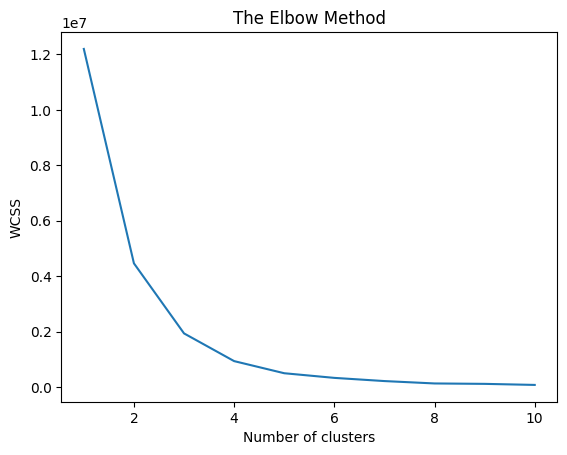

In [18]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#from the elbow plot , we can fix values of k as 5
#building the kmeans clustering model
kmeans= KMeans(n_clusters=3, init='k-means++') #max_iter can be set if we need to fix the number of iterations
y_kmeans= kmeans.fit_predict(x) #output generation

In [21]:
df_fish['Cluster']=y_kmeans
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Cluster
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,2
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,2
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,2
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,0


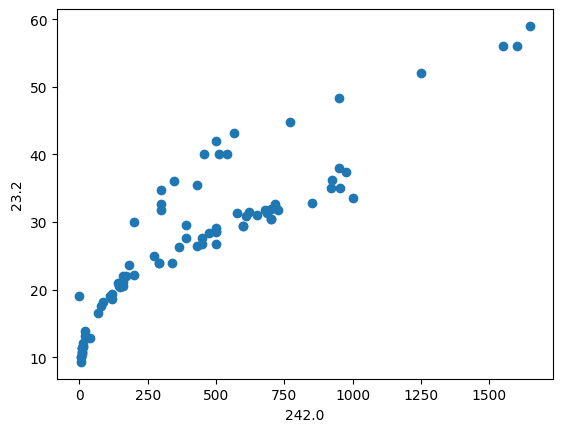

In [24]:
#before clustering
plt.scatter(df_fish['242.0'],df_fish['23.2'],)
plt.xlabel("242.0")
plt.ylabel("23.2")
plt.show()

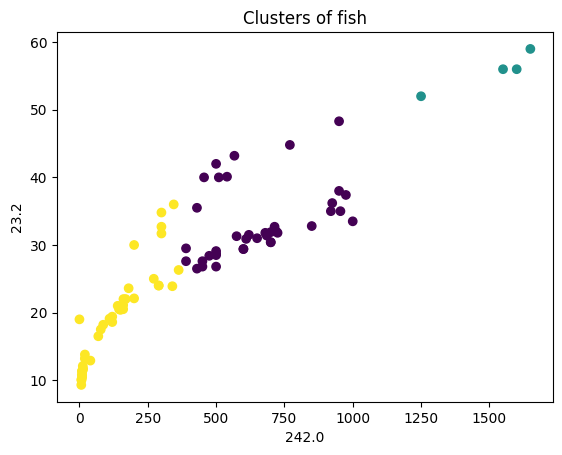

In [25]:
#after clustering
plt.scatter(df_fish['242.0'],df_fish['23.2'], c= df_fish['Cluster'])
plt.title('Clusters of fish')
plt.xlabel('242.0')
plt.ylabel('23.2')
plt.show()


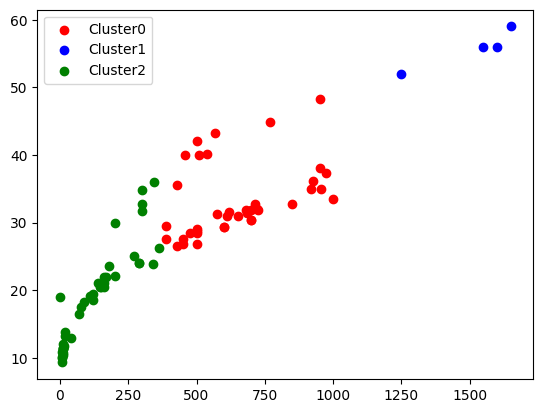

In [30]:
colors= ['red','blue','green']
for i in range(3):
  cluster_data= x[y_kmeans==i]
  plt.scatter(df_fish[df_fish['Cluster']==i]['242.0'],
              df_fish[df_fish['Cluster']==i]['23.2'],
              c=colors[i],label=f'Cluster{i}')
plt.legend()
plt.show()

In [41]:
#predict the cluster
def predict_cluster(new_data):
  cluster=kmeans.predict([new_data])
  return cluster[0]

In [42]:
predicted_cluster= predict_cluster([50, 100, 20, 30, 40, 15]) # Example with 6 features
print("the values belong to the cluster",predicted_cluster)

the values belong to the cluster 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#AGGLOMERATIVE HEIRARCHICAL CLUSTERING

In [36]:
#libraries for agglomerative clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [37]:
ag_cluster =linkage(x,method='ward') #ward, singlee, centroid
#linkage matrix i.e; agglomerative cluster model

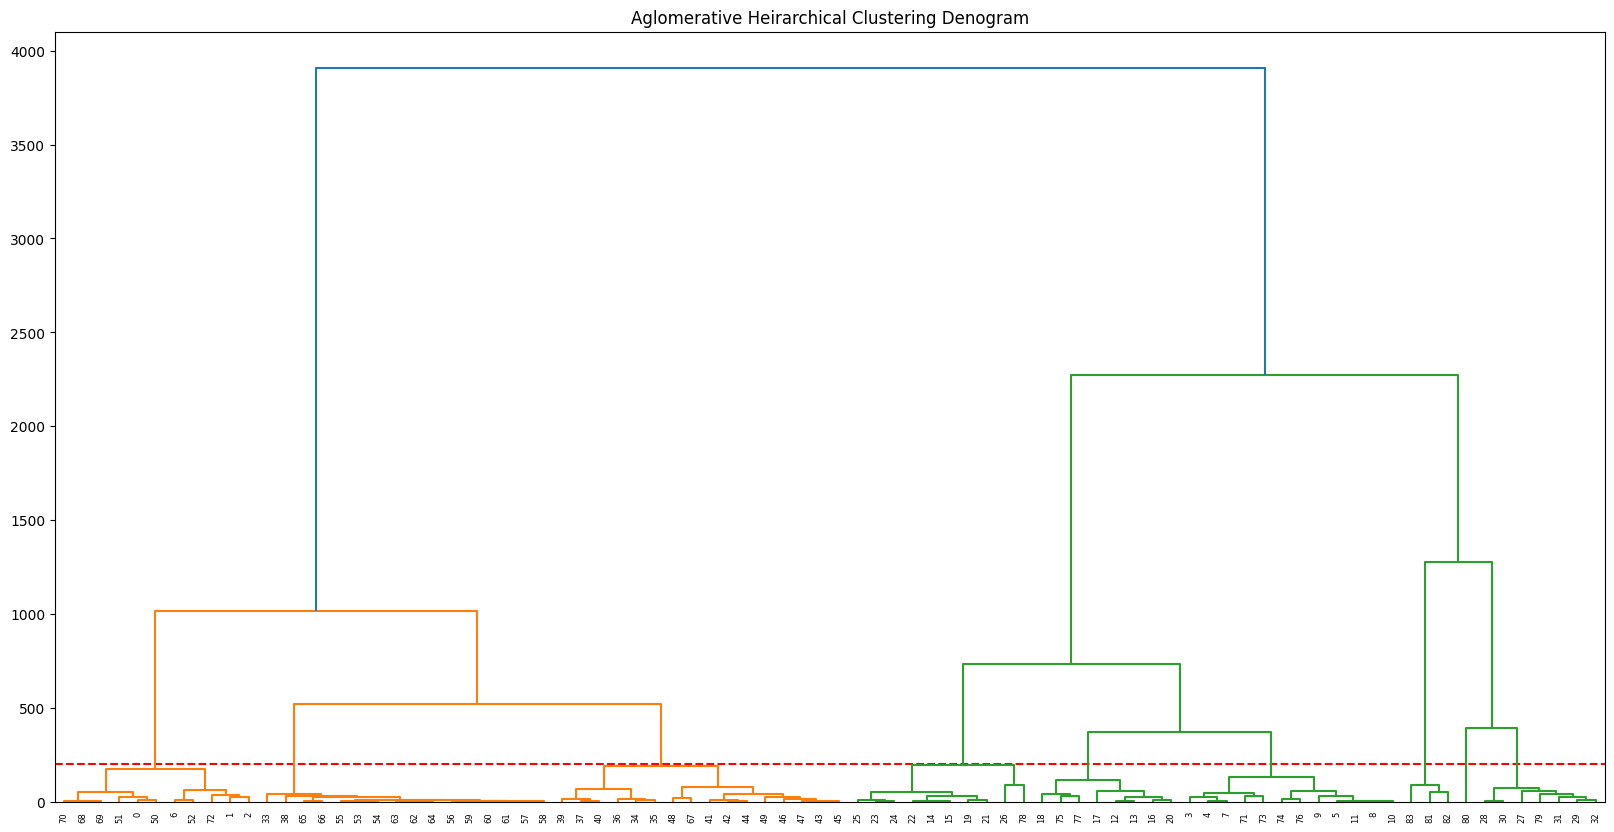

In [39]:
plt.figure(figsize=(20,10))
plt.title('Aglomerative Heirarchical Clustering Denogram')
plt.axhline(y=200,color='r',linestyle='--')
dendrogram(ag_cluster)
plt.show()

In [40]:
cluster_labels= fcluster(ag_cluster,t=200,criterion='distance')
df_fish['Cluster']=cluster_labels
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Cluster
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,1
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,1
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,6
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,6


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

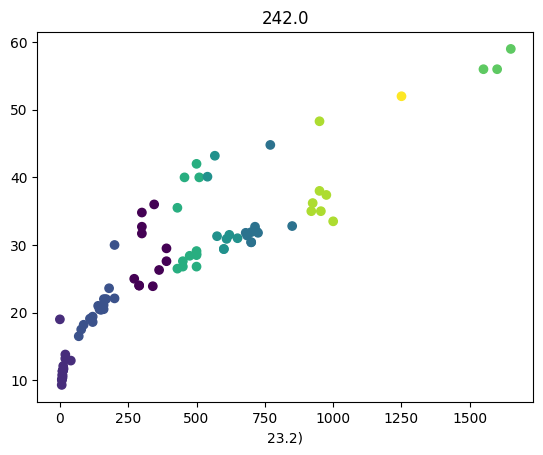

In [43]:
#after clustering
plt.scatter(df_fish['242.0'],df_fish['23.2'], c= df_fish['Cluster'])
plt.title('242.0')
plt.xlabel('23.2)')
plt

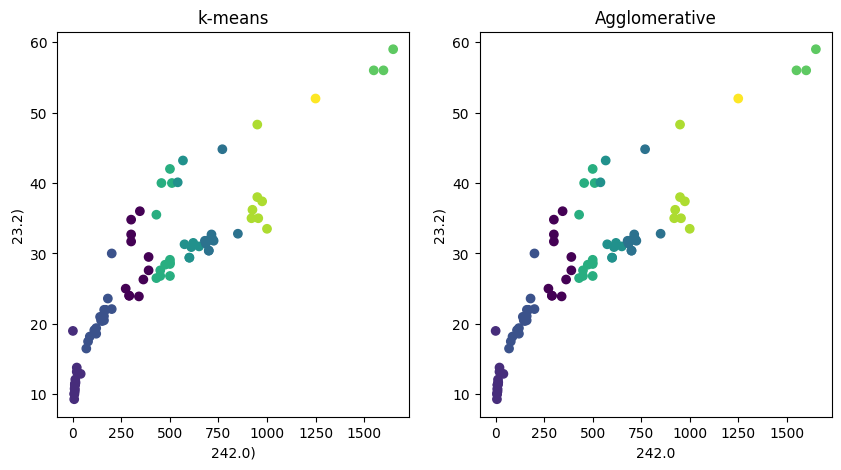

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c= df_fish['Cluster'])
plt.title('k-means')
plt.xlabel('242.0)')
plt.ylabel('23.2)')

plt.subplot(1,2,2)
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c= df_fish['Cluster'])
plt.title('Agglomerative')
plt.xlabel('242.0')
plt.ylabel('23.2)')
plt.show()